## Simple Linear Regression - Auto Insurance In Sweden 

For the curious explorers wanting to play around with this rather tiny dataset, this is __[where](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset)__ you can find it.

Linear regression studies a linear relationship between two or more variables. If we were to draw this relationship in a 2 dimensional space, we'd output a straight line.

We use linear regression to predict(y) dependent variable using (x) independent variable.

###### A simple linear regression is defined by the following equation: 

y = mx + b

y = independent variable (target variable)

m = the slope of the line

x = independent variable (features)

b = the constant / or the point where the line crosses the vertical axis

###### Let's explore the slope of the line (m) in great detail:

if m > 0 : Then x and y have a positive relationship, an increase in x leads to an increase in y.

if m < 0 : Then x and y have a negative relationship, an increase in x decreases y simultaneously.

b refers to the constant or the starting point of our linear regression line when we plot it.

In [31]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### Let's load the dataset and start playing around with it.

In [32]:
#Load and read data 
insurance_data = pd.read_csv('insurance.csv')

insurance_data.head() #display the first 5 rows

,number of claims,total payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [33]:
#display the last 5 rows
insurance_data.tail()

,number of claims,total payment
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6
62,26,187.5


In [34]:
insurance_data.shape

(63, 2)

As we can see, our data has 63 rows and 2 columns.

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

In [35]:
#Get the statistical view of the data
insurance_data.describe()

,number of claims,total payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [36]:
#Check for missing values
insurance_data.isnull().sum()

number of claims     0
total payment        0
dtype: int64

Our dataset has no missing values, meaning we won't have to do any data cleaning. 

We can now create the X-matrix and y-vector.

In [37]:
#Create the X-matrix of features and y-vector target variable
X = insurance_data.iloc[:, :-1].values  #number of claims
y = insurance_data.iloc[:, 1].values    #total payment

In [38]:
#Confirm that X is a matrix and y is a vector
print('X-matrix dependent variable :', X.shape)
print('y-vector independent variable:', y.shape)

X-matrix dependent variable : (63, 1)
y-vector independent variable: (63,)


In [39]:
#Split training and testing data - 80 % training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state= 0)

In [40]:
#Fitting the model to the training set
insurance_regressor = LinearRegression()
insurance_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have trained our model, Let's make some predictions.

In [41]:
#Make predictions
y_predictions = insurance_regressor.predict(X_test)

In [42]:
#Compare Actual Outputs vs Predicted Outputs
insurance_df = pd.DataFrame({'Actual Output': y_test.flatten(), 'Predicted Output': y_predictions.flatten().round(2)})
insurance_df

,Actual Output,Predicted Output
0,152.8,143.10
1,39.9,29.32
2,187.5,106.29
3,93.0,62.79
4,14.6,39.36
5,161.5,92.91
6,38.1,32.67
7,21.3,56.10
8,248.1,179.91
9,15.7,62.79


In [43]:
#Checking the score  
print('Train Score: ', insurance_regressor.score(X_train, y_train) * 100)  
print('Test Score: ', insurance_regressor.score(X_test, y_test) *100)  

Train Score:  86.09706875251975
Test Score:  67.09172184615007


Our model accuracy is 67%, Not a bad score but also not entirely a good one. We'll try our data on a Random Forest Regressor and see if it performs any better.

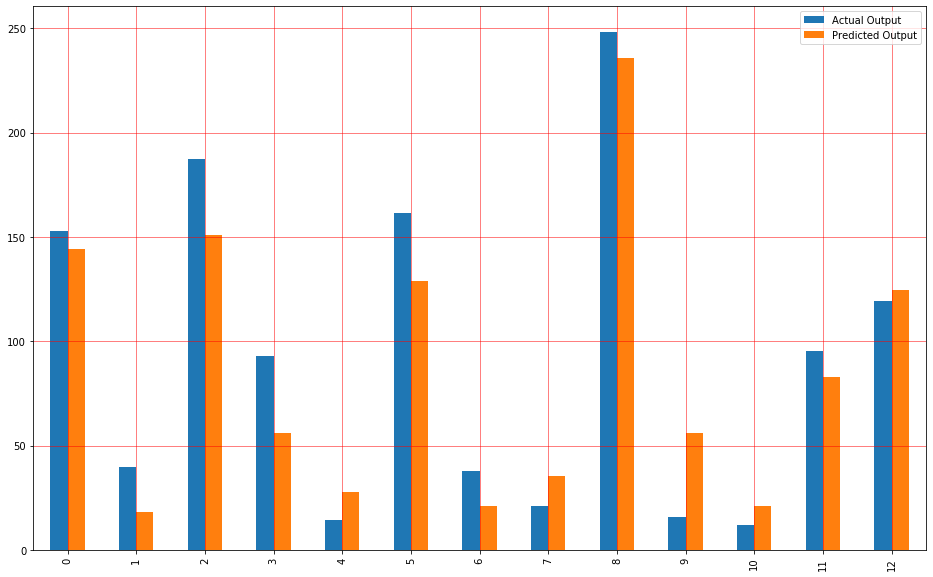

In [63]:
#Visualizing Actual Output vs Predicted Output
df_one = insurance_df.head(20)
df_one.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')

Text(0, 0.5, 'Total Payment')

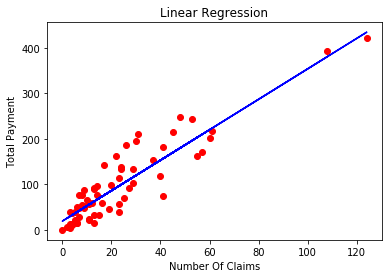

In [59]:
#Visualising Linear Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, insurance_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Number Of Claims')
plt.ylabel('Total Payment')

In [60]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
#Predict a new amount
y_pred = regressor.predict(X_test)

y_pred

array([144.44705556,  18.3658459 , 150.89723333,  56.08078114,
        27.81028677, 128.70415556,  20.90889656,  35.61041825,
       235.733     ,  56.08078114,  20.90889656,  83.15812103,
       124.40013492])

In [62]:
#Compare Actual Outputs vs Predicted Outputs
insurance_df = pd.DataFrame({'Actual Output': y_test.flatten(), 'Predicted Output': y_pred.flatten().round(2)})
insurance_df

,Actual Output,Predicted Output
0,152.8,144.45
1,39.9,18.37
2,187.5,150.90
3,93.0,56.08
4,14.6,27.81
5,161.5,128.70
6,38.1,20.91
7,21.3,35.61
8,248.1,235.73
9,15.7,56.08


In [56]:
# Calculating the performance metrics
print('Train Score: ', regressor.score(X_train, y_train) * 100)  
print('Test Score: ', regressor.score(X_test, y_test) *100)  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  94.61008898132651
Test Score:  90.18633095037707
Mean Absolute Error: 20.008879120879172
Mean Squared Error 540.8099551428105
Root Mean Squared Error 23.255321007090195


Our random performed much better compared to our linear regression on this dataset.

Linear regression is not always suited. For example, Random Forest Regressors can perform very well, and are usually insensitive to data being standardised, and being categorical/continuous.

Text(0, 0.5, 'Total Payment')

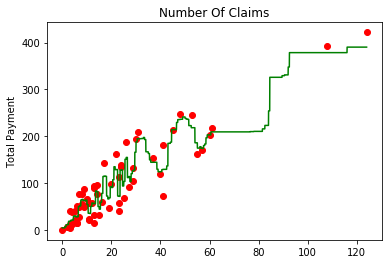

In [57]:
#Visualising Random Forest Regression Results (For higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='green')
plt.title('Number Of Claims')
plt.ylabel('Total Payment')